<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تشخیص تقلب
</font>
</h1>

<center>
<img src="fraud.jpg">
</center>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    به تازگی یک موسسه فروش محصولات، با مشکلی جدی روبرو شده‌است : کلاهبرداری با تراکنش‌های جعلی!
    <br>
    به مدیرعامل این موسسه گزارش شده‌است که افرادی با استفاده از تراکنش‌های جعلی، اقدام به خرید محصولات کرده اما پولی به حساب موسسه وارد نشده‌است. با توجه به حجم سنگین تراکنش‌های این موسسه و نداشتن قابلیت چک کردن تراکنش‌ها به صورت دستی، مدیرعامل سریعاً تصمیم می‌گیرد سیستمی با عنوان تشخیص تقلب پیاده‌سازی کرده تا از بروز این‌گونه اتفاقات جلوگیری شود. بنابراین از شما درخواست‌ شده به این موسسه برای پیاده‌سازی این سیستم کمک کنید. 
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    ابتدا کتابخانه‌های مورد نیازتان را وارد کنید.
</font>
</p>

In [1]:
import numpy as np
import pandas as pd

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
با توجه به اینکه ویژگی‌های تراکنش‌ها در مجموعه‌داده اصلی موسسه بسیار زیاد بود، ابتدا با استفاده از روش کاهش‌ابعاد که در ادامه دوره خواهید خواند، تعداد ویژگی‌ها کاهش یافت و داده نسبتاً تمیزشده‌ای به شکل زیر در اختیار قرار داده شد. داده‌های زیر تراکنش‌های موسسه در مدت دو روز به شکل برچسب‌زده‌شده می‌باشد.
 توضیحات هر ستون به شکل زیر آورده شده‌است.
</font>
</p>

<center>
<div dir=rtl style="line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|نام ویژگی|توضیحات|
|:------:|:---:|
|<code>Time</code>|ویژگی "Time" شامل فاصله زمانی بین هر تراکنش تا اولین تراکنش موجود در مجموعه‌داده است. واحد این ستون، بر حسب ثانیه است.|
|<code>Amount</code>|ویژگی "Amount"، برابر میزان مبلغ تراکنش مربوطه است.|
|<code>V1, V2 … V28</code>|ویژگی‌هایی که با استفاده از کاهش‌ابعاد به دست آمده‌آند.|
|<code>Class</code>|ویژگی "Class"، مشخص‌کننده وجود تقلب یا سالم بودن تراکنش است. در صورتی که مقدار برابر 1 باشد، به‌این معنی‌ست که تراکنش مربوط جعلی بوده و در صورتی که مقدار 0 باشد، تراکنش سالم است.|
    
</font>
</div>
</center>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>fraud_train.csv</code> و نمونه‌های آزمون که باید دسته‌ی آن‌ها را پیش‌بینی کنید در فایل <code>fraud_test.csv
</code> در پوشه‌ی <code>data</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از دادگان آموزشی را به عنوان دادگان اعتبارسنجی نیز جدا کنید. همچنین توجه داشته باشید که در مجموعه‌داده‌ی آزمون ستون <code>Class</code> وجود ندارد و شما باید در نهایت این ستون را پیش‌بینی کنید.
</font>
</p>

In [2]:
train_data = pd.read_csv('../data/fraud_train.csv')
train_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,8365.0,-0.655093,1.102283,1.610914,2.542440,0.928295,0.344427,0.340831,-0.004130,-0.039325,...,0.025710,0.297263,-0.195074,-0.476353,-0.269339,0.154728,-0.004028,0.155044,16.93,0.0
1,10222.0,-0.643681,0.953126,2.223666,1.134587,-0.198051,0.435065,0.221857,0.017773,1.931767,...,-0.066355,0.684519,-0.210179,0.036703,-0.126450,-0.199370,0.377610,0.033734,20.24,0.0
2,35866.0,-2.044489,3.368306,-3.937111,5.623120,-3.079232,-1.253474,-5.778880,1.707428,-4.467103,...,1.483594,0.834311,-0.148486,0.001669,-0.038996,0.389526,1.300236,0.549940,7.61,1.0
3,10836.0,1.020913,-0.400279,0.662579,0.341929,-0.656141,-0.021927,-0.386604,0.054592,1.820545,...,-0.131286,-0.065529,-0.067101,0.260703,0.253718,1.066000,-0.096361,-0.005774,79.95,0.0
4,69.0,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,...,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,5838.0,-1.494748,1.374609,1.739505,-0.404363,0.337228,-0.353954,0.564640,0.103308,0.928487,...,-0.366262,-0.806897,-0.032148,0.084964,0.148915,-0.015621,0.064359,0.193122,5.99,0.0
7836,11005.0,1.308485,0.069616,0.545896,0.115439,-0.312410,-0.324753,-0.373901,-0.216854,1.610789,...,-0.108423,0.013710,-0.132407,-0.392797,0.360448,1.078788,-0.082476,-0.000158,14.95,0.0
7837,8827.0,-1.746494,-0.022183,1.700978,-3.494827,-0.538017,-0.800348,-0.106467,0.517637,2.786295,...,0.152429,0.571973,-0.334028,-0.019782,0.949107,-0.907445,0.167863,-0.020605,74.11,0.0
7838,2097.0,-0.612088,0.568390,1.207450,-2.126447,0.378698,-0.712041,0.776533,0.027359,0.202120,...,0.217032,0.676543,-0.324870,0.030754,0.271729,-0.752923,0.126115,0.097501,1.00,0.0


In [3]:
test_data = pd.read_csv('../data/fraud_test.csv')
test_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,2618.0,-1.906672,-1.437287,1.871960,-2.277146,0.224878,-0.137438,-0.436180,0.447350,1.398436,...,-0.105557,0.324344,0.927203,-0.060459,-0.241201,0.035111,-0.009894,-0.018061,0.239372,129.00
1,742.0,1.304437,-0.709851,-0.112405,-2.207912,-0.355304,0.170636,-0.518525,0.050055,2.470382,...,-0.012647,0.065871,0.610271,-0.375163,-1.229720,0.948828,-0.485356,0.111789,0.012819,25.95
2,9218.0,1.153876,-0.203609,0.878412,0.879436,-0.477480,0.664532,-0.739738,0.290105,2.184308,...,-0.258792,-0.254076,-0.182890,-0.055363,-0.314974,0.398081,0.525719,-0.024923,-0.013459,0.01
3,11262.0,-0.654664,0.658514,1.923801,-1.440155,1.206681,0.397940,0.861397,-0.465204,1.301399,...,0.089678,-0.379451,-0.528356,-0.466774,-1.316150,0.181729,0.826051,-0.499333,-0.429874,11.00
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,14272.0,1.249014,0.449678,0.196640,1.140253,0.284454,-0.136601,0.053458,-0.158091,1.252740,...,-0.188196,-0.129143,-0.016091,-0.124864,-0.504412,0.675462,-0.304683,0.005531,0.005172,0.89
2610,3017.0,-0.873406,0.996277,1.370080,1.314848,-0.289889,0.244702,0.136410,0.704062,-0.730132,...,-0.125464,0.095403,0.227194,-0.110924,0.200514,0.049422,-0.215075,0.007172,0.029088,28.06
2611,5822.0,-1.746504,2.336897,2.211292,3.887689,-0.401255,1.462920,-0.853872,-1.090633,-0.109370,...,-0.073322,1.508737,-0.127188,0.188788,-0.087296,-0.365483,0.143746,0.043014,-0.022648,20.64
2612,7559.0,-0.683262,2.184431,0.086991,1.474910,1.195123,-1.304462,1.143837,-0.219464,-0.059003,...,0.041409,-0.228812,-0.484496,-0.463930,0.130512,0.555804,-0.240149,-0.077529,0.137752,0.89


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی که در فصل‌های گذشته آموختید، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
داده‌های این سوال تا حد زیادی از پیش تمیز شده‌اند و تمامی ستون‌ها نیز از نوع عددی هستند، بنابراین نیاز به پیش‌پردازش خاصی وجود ندارد. با این حال، امکان شناسایی و حذف داده‌های پرت وجود دارد. دقت داشته باشید که در صورت تصمیم به حذف داده‌های پرت، به دلیل ماهیت سوال که مربوط به تشخیص تقلب است، وجود داده‌های پرت در تراکنش‌های دارای برچسب تقلب منطقی است. بنابراین، تنها باید داده‌های پرت مربوط به تراکنش‌های سالم را شناسایی و حذف کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
اگر در داده‌های خود تغییراتی مانند حذف، ایجاد ویژگی‌های جدید یا تغییر مقیاس اعمال می‌کنید، دقت کنید که این تغییرات را به طور یکسان روی داده‌های آزمون نیز اعمال کنید. این کار برای اطمینان از سازگاری و دقت مدل ضروری است تا داده‌های آزمون به همان شیوه‌ای پردازش شوند که داده‌های آموزشی پردازش شده‌اند.
</font>
</p>

<Axes: >

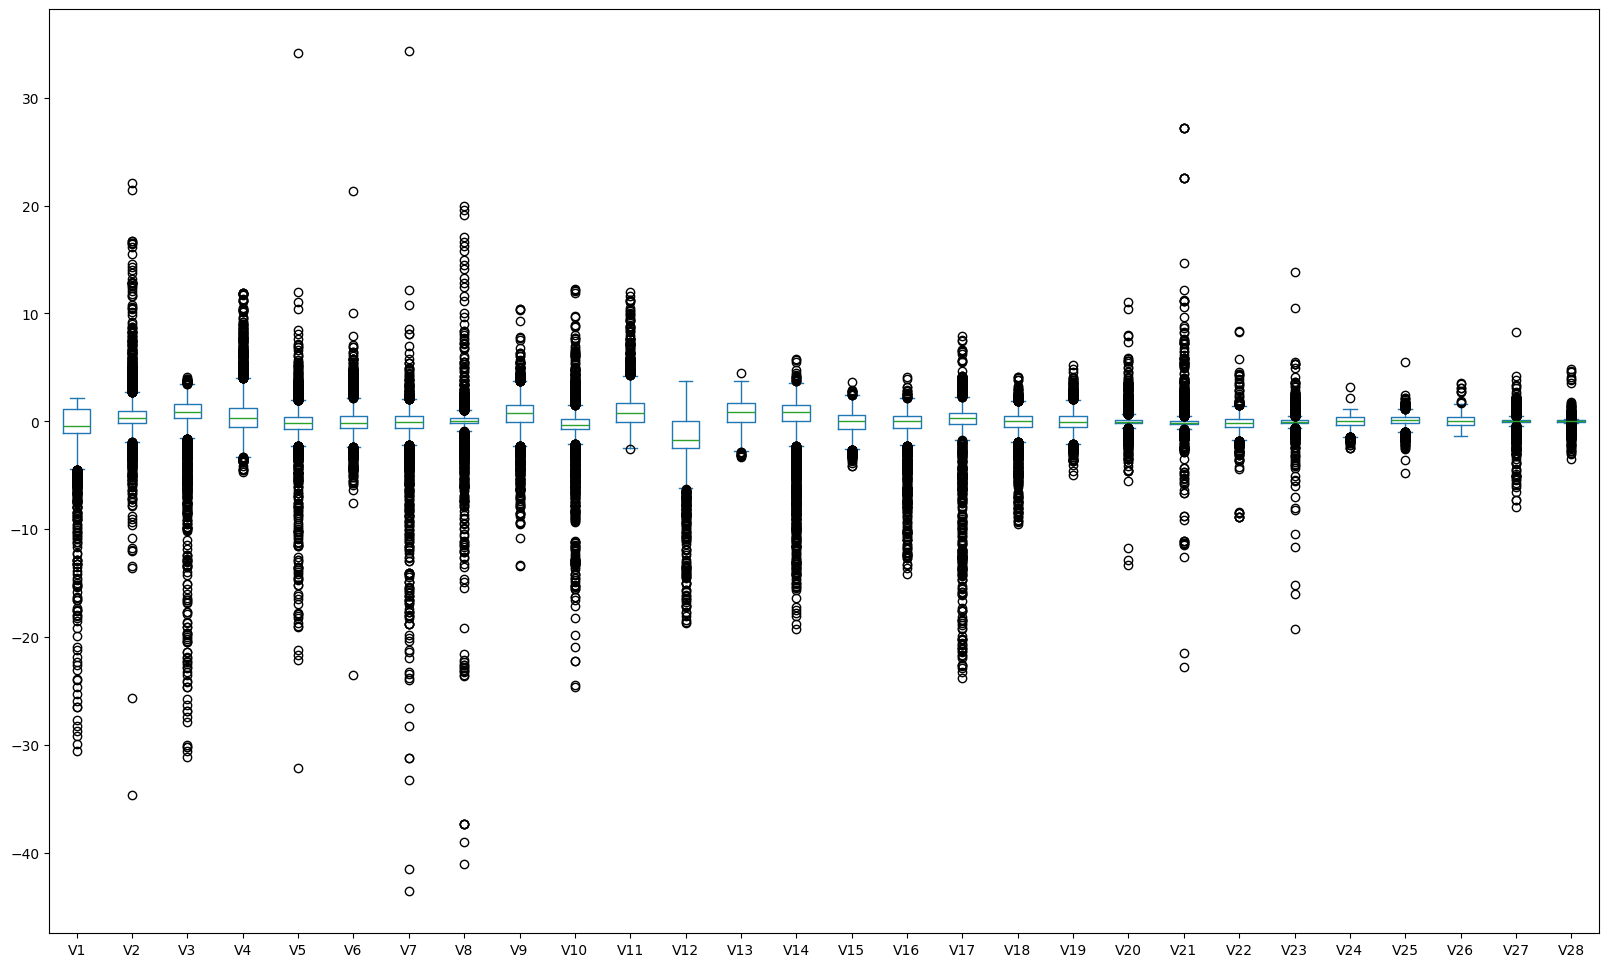

In [4]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20, 12))
train_data.loc[:, 'V1':'V28'].plot(kind = 'box', ax=ax)

In [5]:
def cap_data(df):
    indexes = []
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            V_quartile_1 = np.quantile(df[col], 0.25)
            V_quartile_3 = np.quantile(df[col], 0.75)
            V_IQR = V_quartile_3 - V_quartile_1
            V_lowerbound = V_quartile_1 - (1.5 * V_IQR)
            V_upperbound = V_quartile_3 + (1.5 * V_IQR)
            outliers = df[(df[col] < V_lowerbound) | (df[col] > V_upperbound)].index
            indexes.extend(outliers)
    return list(set(indexes)) 
idx = cap_data(train_data.loc[train_data.Class == 0, 'V1':'V28'])
train_data = train_data.loc[~train_data.index.isin(idx)]

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل‌سازی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
پس از پیش‌پردازش داده‌ها، اکنون زمان آن رسیده است که مدلی را آموزش دهید تا بتواند متغیر هدف این مسئله را با دقت پیش‌بینی کند. 
</font>
</p>

<h3 align="right" style="direction: rtl; text-align: right; line-height:200%; font-family:vazir; color:#0099cc">
    <font face="vazir" color="#0099cc">
        استفاده از <code>scikit-learn</code>
    </font>
</h3>

<p dir="rtl" style="direction: rtl; text-align: right; line-height:200%; font-family:vazir; font-size:medium">
    <font face="vazir" size="3">
        الگوریتم دسته‌بندی <i>SVM</i> با نام <code>SVC</code> در پکیج <code>svm</code> این کتابخانه در دسترس است. 
        توجه کنید الگوریتم رگرسیون <i>SVM</i> نیز با نام <code>SVR</code> در همین پکیج برای مسائل رگرسیون قابل استفاده می‌باشد.
        برخی از آرگومان‌های مهم آن در جدول زیر آمده است، اما جهت مطالعه‌ی کامل‌تر مستندات می‌توانید به 
        <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html" target="_blank">این لینک</a> مراجعه فرمایید.
    </font>
</p>

<center>
    <div dir="rtl" style="line-height:200%; font-family:vazir; font-size:medium">
        <font face="vazir" size="3">
            <table border="1" cellpadding="10" cellspacing="0">
                <tr>
                    <th>آرگومان</th>
                    <th>توضیحات</th>
                </tr>
                <tr>
                    <td><code>C</code></td>
                    <td>همانطور که گفتیم، هایپرپارامتر همواره مثبت ‍<code>C</code> در الگوریتم SVM در Sklearn، عملیات موازنه را انجام می‌دهد. هرچه مقدار این هایپرپارامتر بیشتر باشد، اهمیت Hard Margin بیشتر خواهد شد. به عبارت دیگر، این آرگومان در منظم‌سازی موثر است. البته تاثیر <code>C</code> در منظم‌سازی، به صورت معکوس است. به این معنی که با کاهش <code>C</code>، الگوریتم عبارت‌های مخصوص منظم‌سازی، اثر بیشتری بر ضرایب خواهد داشت.</td>
                </tr>
                <tr>
                    <td><code>kernel</code></td>
                    <td>نوع کرنل استفاده شده در الگوریتم را مشخص می‌کند. به صورت پیش‌فرض برابر <code>rbf</code> می‌باشد. اما این آرگومان را می‌توان با <code>poly</code>, <code>linear</code> و <code>sigmoid</code> نیز مقداردهی کرد.</td>
                </tr>
                <tr>
                    <td><code>degree</code></td>
                    <td>هنگامی که کرنل برابر <code>poly</code> شود، این هایپرپارامتر درجه کرنل چندجمله‌ای را مشخص می‌کند. در صورت استفاده از سایر کرنل‌ها این هایپرپارامتر نادیده گرفته می‌شود.</td>
                </tr>
            </table>
        </font>
    </div>
</center>


<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در سلول زیر با استفاده از مدل آماده‌ای که در بالا شرح داده شد و به کمک تابع <code>fit</code> الگوریتم را بر روی دادگان آموزشی اجرا کنید.
</font>
</p>

In [6]:
from sklearn.model_selection import train_test_split
train , validation = train_test_split(train_data, train_size=.9, stratify=train_data.Class)

In [7]:
from sklearn.svm import SVC

X_train, y_train = train.drop(columns=['Class']), train['Class']

model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

<h3 align="right" style="line-height:200%; font-family:vazir; color:#0099cc">
   <font face="vazir" color="#0099cc">
       معیار ارزیابی
   </font>
</h3>


<p dir="rtl" style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
   <font face="vazir" size="3">
با توجه به عدم توازن (imbalance) در دیتاست و تفاوت تعداد نمونه‌ها در هر کلاس، معیاری که برای ارزیابی عملکرد مدل انتخاب شده است، <code>F1-score</code> می‌باشد.        <br>
       این معیار، سنجه‌ای برای ارزیابی کیفیت مدل شماست. به عبارت بهتر، در سامانه داوری نیز از همین معیار برای نمره‌دهی استفاده شده است.
       <br>
       پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی دادگان آموزش یا اعتبارسنجی ارزیابی کنید.<br>همچنین، توجه داشته باشید که برای محاسبه <code>F1-score</code>، باید پارامتر <code>"average = "weighted</code> را تنظیم کنید. دلیل این انتخاب، توزیع نامتوازن کلاس‌ها است؛ پارامتر <code>weighted</code> اطمینان می‌دهد که تأثیر هر کلاس بر معیار نهایی بر اساس فراوانی آن در مجموعه داده‌ها باشد، به این ترتیب کلاس‌های پرجمعیت‌تر نقش بیشتری در ارزیابی نهایی ایفا خواهند کرد.
   </font>
</p>


In [8]:
from sklearn.metrics import f1_score, classification_report

X_valid, y_valid  = validation.drop('Class', axis=1) , validation.Class
y_pred = model.predict(X_valid)

print(f"model f1-score on training data: {f1_score(y_valid, y_pred, average='weighted') * 100}%")
print('classification report: ')
print(classification_report(y_valid, y_pred))

model f1-score on training data: 100.0%
classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       434
         1.0       1.00      1.00      1.00        37

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
 جهت کسب امتیاز کامل نیاز است تا پاسخ شما حداقل امتیاز <code>95</code> را با توجه به معیار معرفی‌شده کسب نماید.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی برای داده تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پس از مهندسی ویژگی و مدلسازی، الگوریتمی دارید که می‌تواند شما را از متغیرهای مستقل به متغیر هدف برساند.
    <br>
    از این مدل برای پیش‌بینی نمونه‌های موجود در داده تست استفاده کنید و نتایج را در قالب جدول (<code>dataframe</code>) زیر آماده کنید.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
|ستون|توضیحات|
|:------:|:---:|
|Class|مشخص‌کننده جعلی یا واقعی‌بودن تراکنش|
    
</font>
</div>



<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    اسم دیتافریم باید <i>submission</i> باشد؛ در غیر این صورت، سامانه داوری نمی‌تواند تلاش‌ شما را ارزیابی کند.
    <br>
    این دیتافریم تنها شامل ۱ ستون با اسم <i>Class</i> است و ۲۶۱۴ سطر دارد.
    <br>
    به ازای هر سطر موجود در دیتافریم <i>test_data</i> شما باید یک مقدار پیشبینی شده داشته باشید.
    <br>
    جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته در جواب شما، اعداد ستون <i>Class</i> ممکن است متفاوت باشد.
</font>
</p>

<div style="text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<center>
    
||Class|
|----|-----|
|0|0.0|
|1|0.0|
|2|0.0|
|3|1.0|
|4|0.0|

</center>
</font>
</div>



In [9]:
# predict labels for test samples

test_pr = model.predict(test_data)
submission = pd.DataFrame(data=test_pr, columns=['Class'])

In [10]:
submission

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2609,0.0
2610,0.0
2611,0.0
2612,0.0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [11]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)


joblib.dump(model, 'model')
submission.to_csv('submission.csv', index=False)

file_names = ['model', 'submission.csv', 'fraud_detection.ipynb']
compress(file_names)

File Paths:
['model', 'submission.csv', 'fraud_detection.ipynb']
